In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('hr-analytic.csv')
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [32]:
data.isna().sum()/len(data)*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

<AxesSubplot:>

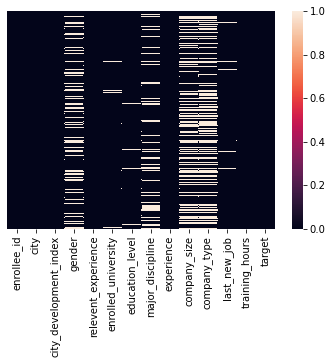

In [6]:
sns.heatmap(data.isna(), yticklabels= False)

terdapat data missing value di sebagian feature

In [33]:
#data= data.fillna('Unknown')
data['target']= data['target'].astype('int')

Tujuan mengisi missing value dengan 'Unknown' agar tidak mengganggu analysis data, namun untuk modeling, akan di impute sesuai kebutuhan feature.

In [8]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [9]:
data.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

- Target: 
>* 'target'
>1. 0: Stay
>2. 1: Resign (berkeinginan bekerja di perusahaan yang mengadakan training)
- Category Feature:
>* 'city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job'

- Numeric Feature:
>* 'city_development_index','training_hours'

'enrollee_id' merupakan unique column dan tidak dapat digunakan untuk analysis


# Target

In [10]:
data['target'].value_counts()

0    14381
1     4777
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

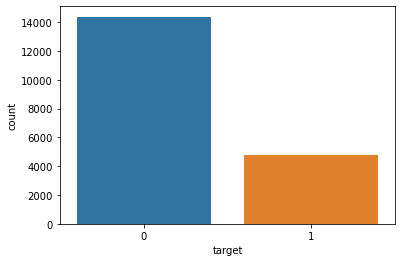

In [11]:
sns.countplot(data['target'])

dari plot diatas, kita bisa melihat bahwa ada kecenderungan data imbalance

# Category VS Target:

In [12]:
cat_feature= ['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']

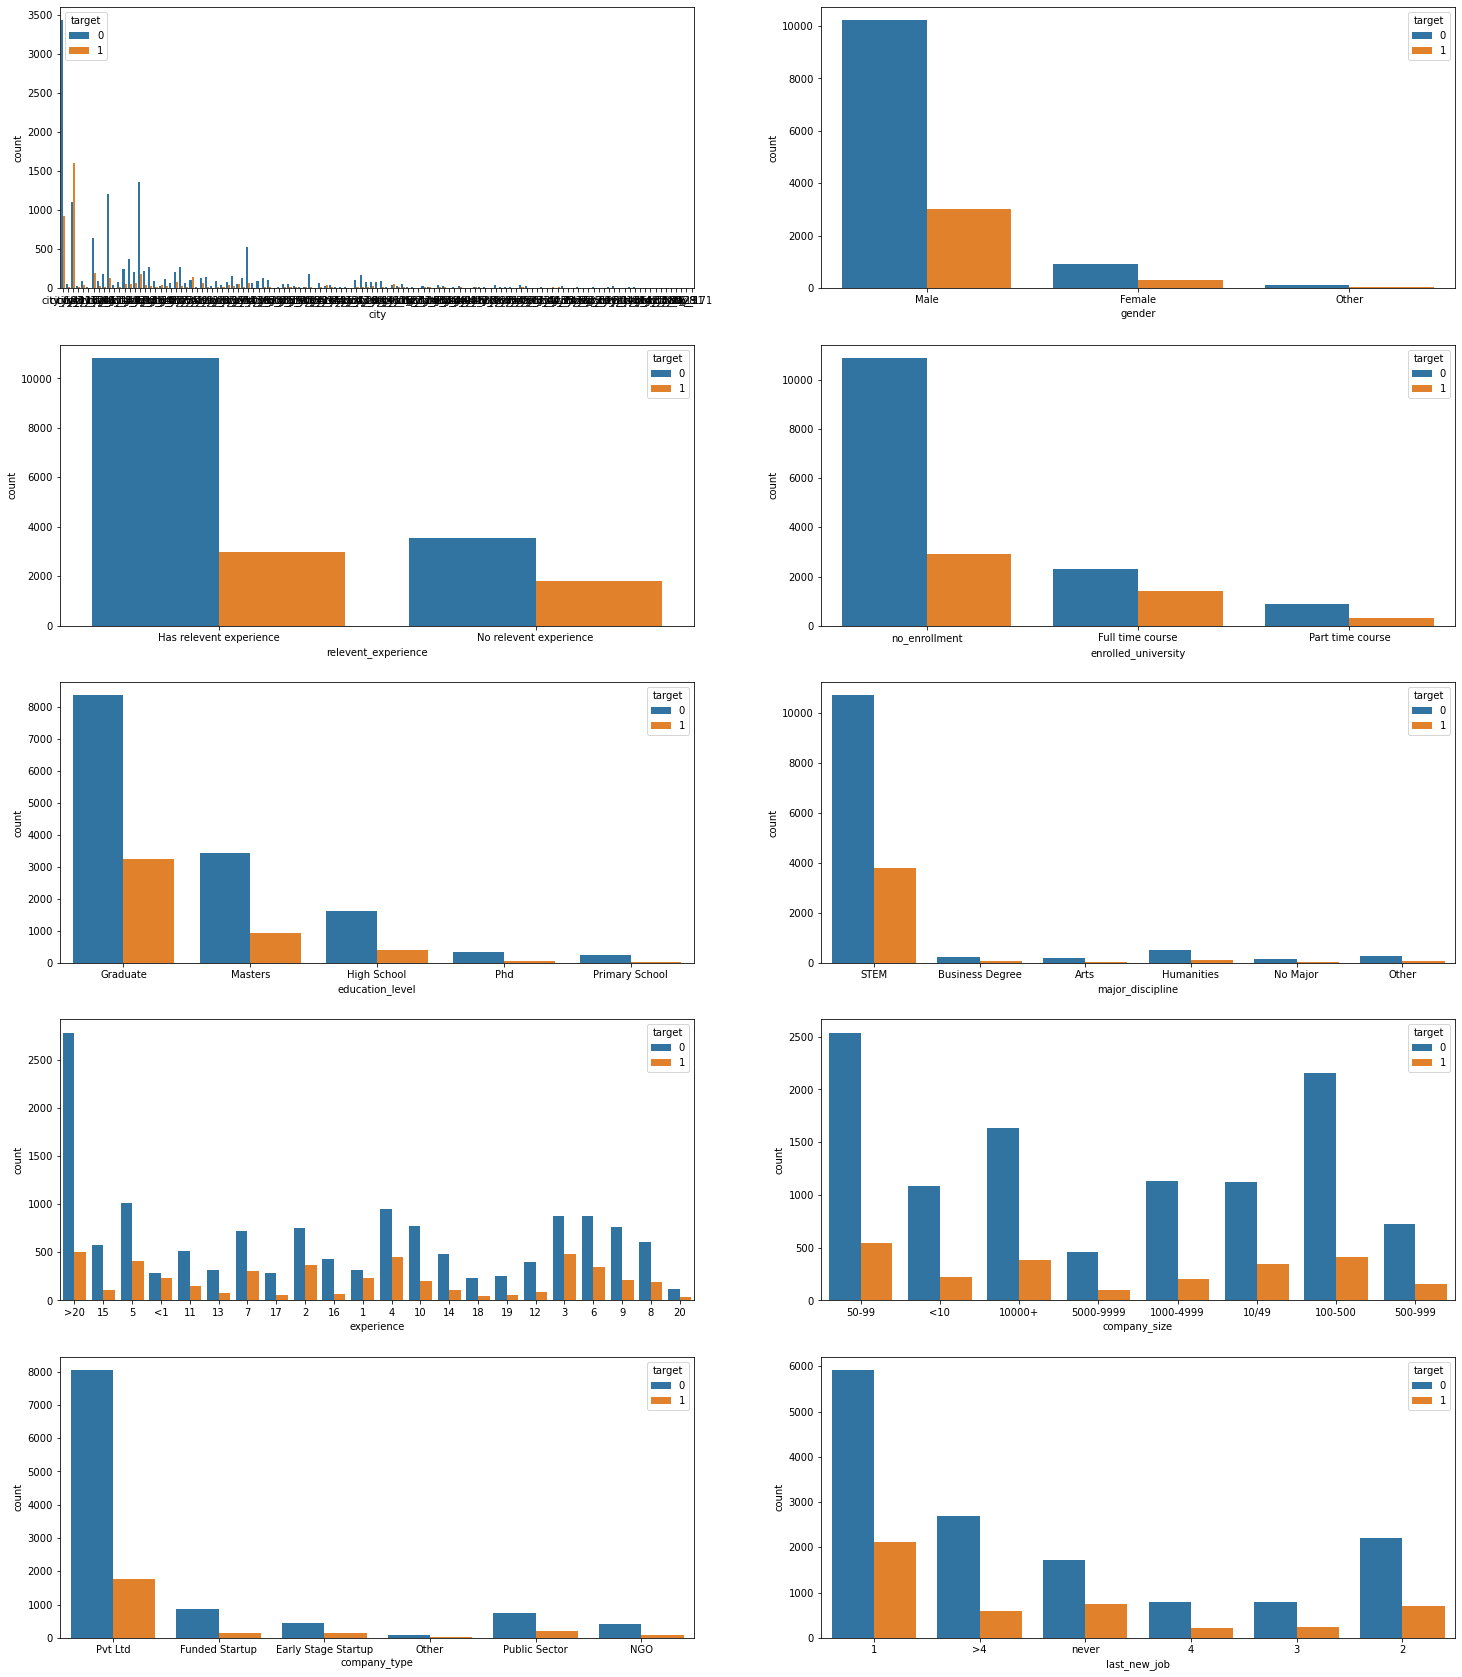

In [13]:
fig, axes= plt.subplots(5,2, figsize=(25,30))
for cat, ax in zip(cat_feature, axes.flatten()):
    sns.countplot(cat, data= data, hue= 'target', ax=ax)

In [14]:
def pct_count(column): #fungsi untuk menghitung persentase resign(berkeinginan bekerja di perusahaan yang mengadakan training)
    col= data[data['target']== 1][column].value_counts()
    pct= pd.DataFrame({'pct(%)' : round(col/ data[column].value_counts()*100,2)}).reset_index()
    uniq= pd.DataFrame({'Unique':col.index.unique()}).reset_index()
    return uniq.merge(pct, left_on= 'Unique', right_on= 'index').drop(['index_x','index_y'],axis= 1).set_index('Unique').sort_values('pct(%)', ascending= False)

In [15]:
for i in cat_feature:
    print(f'Persentase {i} yang resign(berkeinginan bekerja di perusahaan yang mengadakan training)')
    print(pct_count(i))
    print('\n')

Persentase city yang resign(berkeinginan bekerja di perusahaan yang mengadakan training)
          pct(%)
Unique          
city_171  100.00
city_139   80.00
city_155   78.57
city_42    69.23
city_107   66.67
...          ...
city_138    8.33
city_36     8.12
city_28     7.81
city_97     7.69
city_77     3.12

[115 rows x 1 columns]


Persentase gender yang resign(berkeinginan bekerja di perusahaan yang mengadakan training)
        pct(%)
Unique        
Female   26.33
Other    26.18
Male     22.78


Persentase relevent_experience yang resign(berkeinginan bekerja di perusahaan yang mengadakan training)
                         pct(%)
Unique                         
No relevent experience    33.84
Has relevent experience   21.47


Persentase enrolled_university yang resign(berkeinginan bekerja di perusahaan yang mengadakan training)
                  pct(%)
Unique                  
Full time course   38.09
Part time course   25.21
no_enrollment      21.14


Persentase education_level yang

#### Kesimpulan :
* city memiliki banyak Unique data yang menyebabkan plot menjadi sulit dibaca. **Dari hasil perhitungan persentase resign, hasil analisa city menjadi bias karena memiliki banyak Unique data**, misalkan 1 jenis kota hanya 1 orang yang training dan orang tersebut memilih resign(berkeinginan bekerja di perusahaan yang mengadakan training; target= 1) yang mengakibatkan persentase permisalan ini 100pct

* Data Gender cukup bias karena terdapat banyak missing data. dari analisa di atas, Gender female dan other memiliki persentase yang seimbang yaitu 26%, yang mengartikan **gender female dan other lebih tertarik untuk resign dibandingkan male**

* Kandidat yang memiliki pengalaman yang relevan memiliki persentase yang lebih kecil, kemungkinan hal tsb terjadi karena **sudah bekerja di bidang yang sama atau kandidat mengikuti training untuk memperdalam pengetahuan dibidang tsb**. Sedangkan kandidat yang belum memiliki pengalaman yang relevan memiliki persentase yang lebih besar, kemungkinan hal tsb terjadi karena **kandidat memiliki rasa penasaran dengan bidang tsb**.

* Kandidat yang terdaftar di universitas dengan Full Time Course memiliki persentase yang lebih tinggi dibanding yang lain karena **kemungkinan ada banyak kandidat yang baru bekerja/belum pernah bekerja(*sudah di analisa di plot dibawah*)**, sedangkan yang mengambil Part Time Course atau Tidak terdaftar di universitas **sudah berkerja(*sudah di analisa di plot dibawah*)**

* Level edukasi kandidat yang terbesar adalah Graduate, kemungkinan karena **jumlah kandidat yang mengikuti training mayoritas memiliki level edukasi Graduate jadi menjadi bias**, sedangkan untuk Master sedikit lebih kecil karena **kemungkinan sudah nyaman dipekerjaan nya saat ini dan tidak mudah untuk memulai karir dari awal**,  Phd lebih rendah kemungkinan karena tujuan mengikuti training untuk memperdalam pengetahuan dibidang tsb. 

* Major discipline kandidat yang tertinggi yaitu Business dan STEM (Science, Technology, Engineering, and Math), dimana itu masuk akal karena **kemungkinan kandidat akan cukup tertarik dengan Data Science**. Secara keseluruhan, perbedaan persentase tidak terlalu jauh jaraknya, sehingga bisa di bilang Major Discipline memiliki pengaruh yang rendah terhadap target.

* Dari data experience, dapat kita lihat semakin tinggi experiencenya, semakin kecil persentase resign, dan sangat masuk akal karena:
1. Jika experience relevan dengan data science, ada kemungkinan untuk resign
2. Jika experience tidak relevan dengan data science, untuk memulai dari 0 adalah hal yang sulit dan tidak realistis

* Untuk ukuran perusahaan cukup **bias** karena terdapat banyak missing data didalamnya. Secara teori semakin besar perusahaan, semakin kecil persentase karena bekerja di perusahaan yang lebih besar berkemungkinan lebih stabil dan lebih memperhatikan kesejahteraan karyawan. namun dari hasil tsb, ukuran perusahaan sangat besar (10.000+ ,5000-9999) ada di peringkat 2 dan 3. bisa jadi hal tsb terjadi karena adanya bias, atau adanya kesulitan berkembang di perusahaan yang terlalu besar. sedangkan untuk perusahaan sangat kecil (<10) berada di peringkat kedua terakhir, kemungkinan karena perusahaan merupakan startup yang sedang berkembang dan tujuan training untuk menambah pengetahuan. namun karena hasilnya cukup menyebar, kemungkinan terjadi karena ada nya bias

* Company type cukup bias karena terdapat banyak missing data didalamnya. namun dari hasil analisa, terlihat untuk startup early stage mendapatkan persentase yang cukup tinggi karena adanya kemungkinan perusahaan tidak stabil atau penuh ketidakpastian, dan untuk Funded startup berada di peringkat terakhir dan sangat masuk akal karena perusahaan sedang berada di masa berkembang dan banyak pelajaran yang bisa didapatkan dari perusahaan yang sedang berkembang.

* Sangat masuk akal jika kandidat yang baru pertama kali kerja tertarik untuk resign, dan semakin tinggi jarak pekerjaan lama dengan pekerjaan sekarang, semakin rendah persentase untuk berpindah perusahaan. karena terkadang ada orang yang suka berpindah pindah pekerjaan atau ada orang yang setia dengan pekerjaan.

<AxesSubplot:title={'center':'Analisa enrolled_university VS last_new_job'}, xlabel='enrolled_university', ylabel='count'>

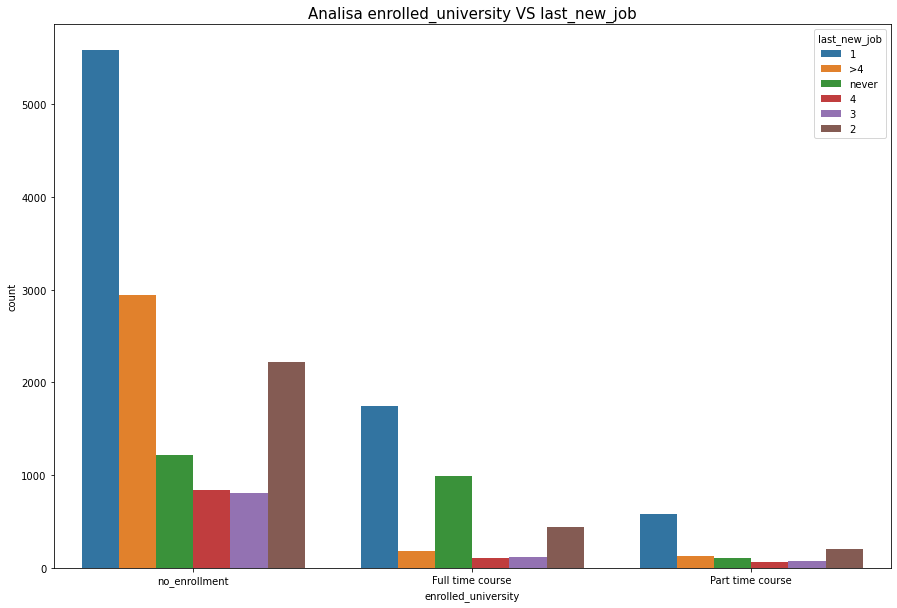

In [49]:
plt.figure(figsize=(15,10))
plt.title('Analisa enrolled_university VS last_new_job', fontsize= 15)
sns.countplot(data['enrolled_university'],hue= data['last_new_job'])

<AxesSubplot:title={'center':'Analisa enrolled_university VS experience'}, xlabel='enrolled_university', ylabel='count'>

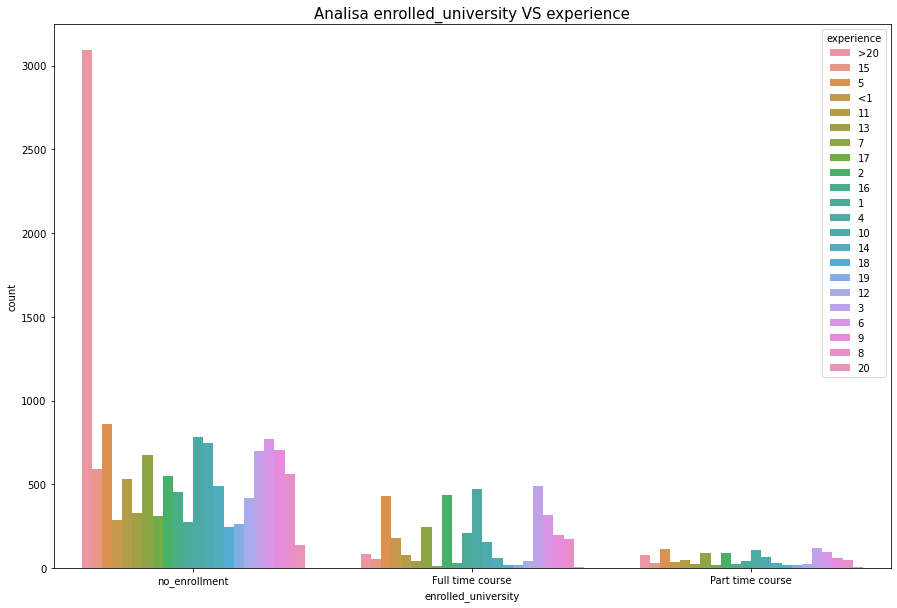

In [52]:
plt.figure(figsize=(15,10))
plt.title('Analisa enrolled_university VS experience', fontsize= 15)
sns.countplot(data['enrolled_university'],hue= data['experience'])

dari sini terlihat data no_enrollment memiliki experience yang tinggi (>20)

# Numeric VS Target

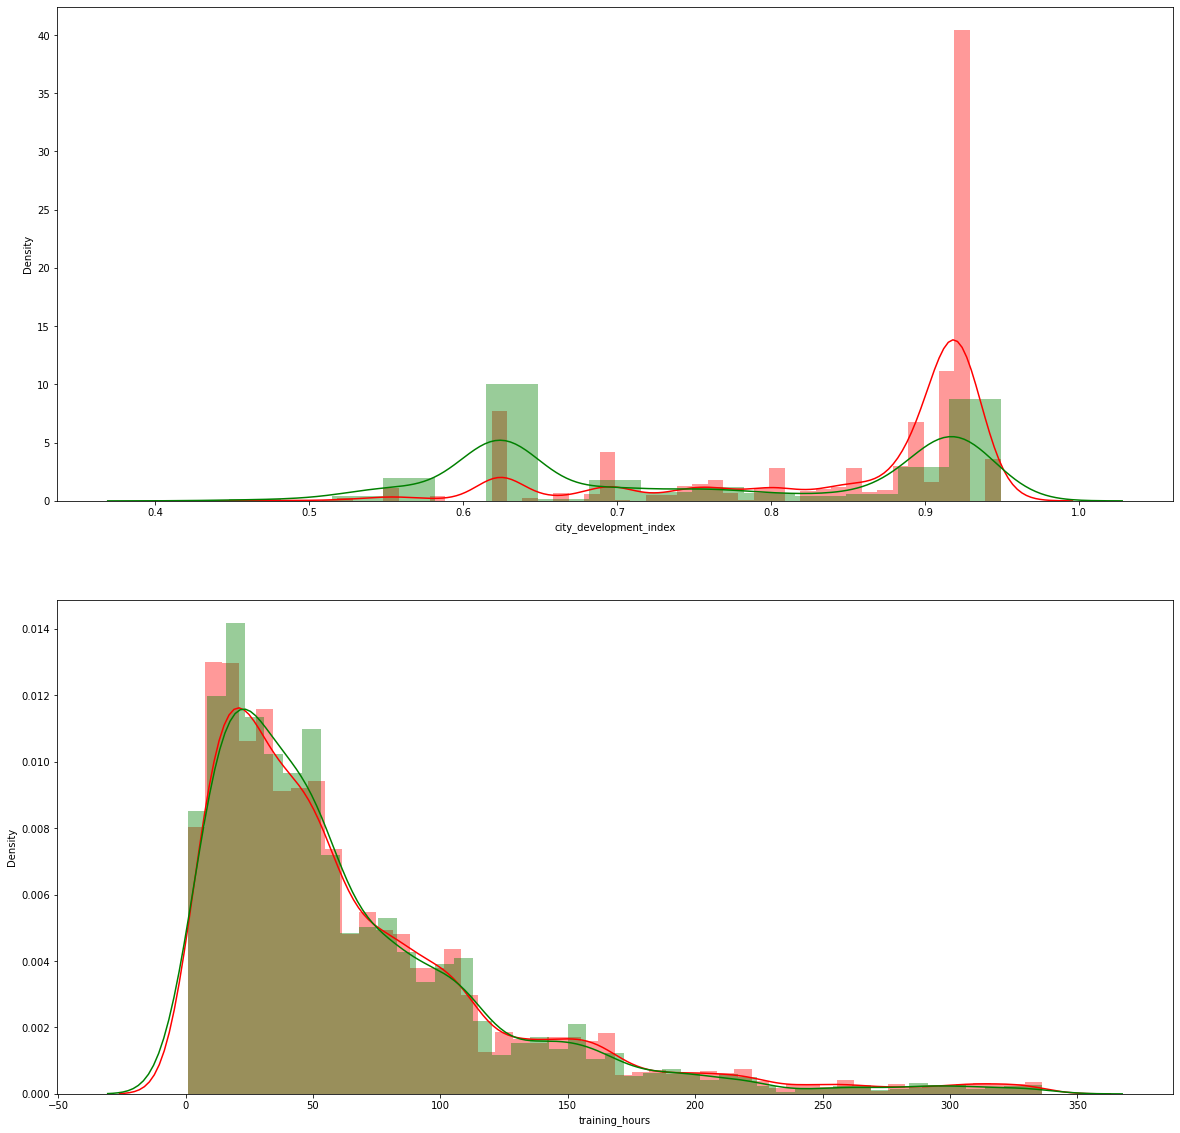

In [28]:
num_feature= ['city_development_index','training_hours']

fig, axes= plt.subplots(2,1, figsize=(20,20))
for num, ax in zip(num_feature, axes.flatten()):
    sns.distplot(data[data['target']==0][num],color= 'r', ax=ax)
    sns.distplot(data[data['target']==1][num],color= 'g', ax=ax)

**Kesimpulan:**
- Dari plot city_development_index, dapat dilihat ada kecenderungan kota dengan development lebih kecil memiliki ketertarikan yang lebih tinggi untuk berpindah perusahaan. karena dengan berpindah tempat kerja, ada peluang untuk mengembangkan income/kesejahteraan kandidat dan memungkinkan kandidat untuk berpindah ke kota dengan development lebih tinggi atau meningkatkan city_development_index kota yang ditempati sekarang. berikut rumus untuk menghitung city_development_index:
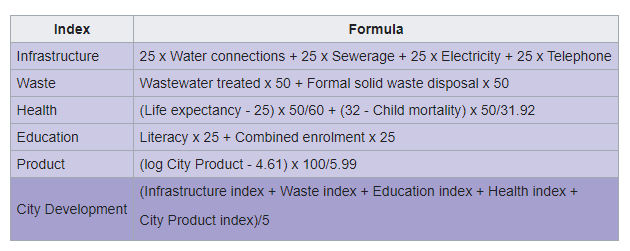 source: https://en.wikipedia.org/wiki/City_development_index



- Dari plot training_hours, tidak ada perbedaan yang signifikan, namun ada kecenderungan kandidat dengan jumlah training hour rata-rata (median), lebih cenderung untuk berpindah pekerjaan. namun tetap tidak signifikan.